 
>Name: Kammari Santhosh

>Roll no:2018IMT-043



#DATA ANALYSIS AND PREPROCESSING

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from matplotlib.colors import ListedColormap
import sys

Reading dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA='/content/drive/MyDrive/Data/bs140513_032310.csv'
dataset=pd.read_csv(DATA)
dataset.head(8)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0


In [ ]:
S=dataset.shape
N=S[0]                          #N=no of  transactions
M=S[1]                          #M=no of features
print("The no of examples taken=",N)
print()
print("No of features used=",M) 

The no of examples taken= 594643

No of features used= 10


search for missing

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
booldataset=dataset.isna()             #sets Nan values to bool
booldataset.any()                      #sum over columns
x=booldataset.any().sum()                #return no of nan values
print("No of Null values in given dataset =",x)


No of Null values in given dataset = 0


In [ ]:
#dataset.columns

In [ ]:
#features=['step','customer','age','gender','merchant','category','amount','fraud']
#plt.figure(figsize=(15,30))
#i=1
#for j in range(8):
  #plt.subplot(6,3,i)
 # sns.countplot(dataset[features[j]],data=dataset)
  #i=i+1

In [ ]:
print(dataset)

        step       customer  age  ...             category amount fraud
0          0  'C1093826151'  '4'  ...  'es_transportation'   4.55     0
1          0   'C352968107'  '2'  ...  'es_transportation'  39.68     0
2          0  'C2054744914'  '4'  ...  'es_transportation'  26.89     0
3          0  'C1760612790'  '3'  ...  'es_transportation'  17.25     0
4          0   'C757503768'  '5'  ...  'es_transportation'  35.72     0
...      ...            ...  ...  ...                  ...    ...   ...
594638   179  'C1753498738'  '3'  ...  'es_transportation'  20.53     0
594639   179   'C650108285'  '4'  ...  'es_transportation'  50.73     0
594640   179   'C123623130'  '2'  ...         'es_fashion'  22.44     0
594641   179  'C1499363341'  '5'  ...  'es_transportation'  14.46     0
594642   179   'C616528518'  '4'  ...  'es_transportation'  26.93     0

[594643 rows x 10 columns]


In [ ]:
data_found_fraud = dataset.loc[dataset.fraud == 1]
data_non_fraud = dataset.loc[dataset.fraud == 0]
print("FRAUD")
print(data_found_fraud.head(4))
print("NOT FRAUD")
print(data_non_fraud.head(4))



FRAUD
     step       customer  age  ...            category  amount fraud
88      0   'C583110837'  '3'  ...         'es_health'   44.26     1
89      0  'C1332295774'  '3'  ...         'es_health'  324.50     1
434     0  'C1160421902'  '3'  ...  'es_hotelservices'  176.32     1
435     0   'C966214713'  '3'  ...  'es_hotelservices'  337.41     1

[4 rows x 10 columns]
NOT FRAUD
   step       customer  age  ...             category amount fraud
0     0  'C1093826151'  '4'  ...  'es_transportation'   4.55     0
1     0   'C352968107'  '2'  ...  'es_transportation'  39.68     0
2     0  'C2054744914'  '4'  ...  'es_transportation'  26.89     0
3     0  'C1760612790'  '3'  ...  'es_transportation'  17.25     0

[4 rows x 10 columns]


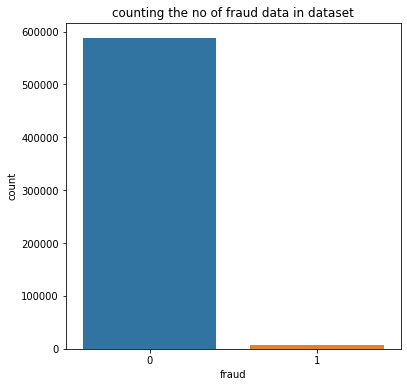

Number of  examples:  587443
Number of fradulent examples:  7200


In [ ]:
#plotting fraud and non fraud data sets
sns.countplot(x="fraud",data=dataset)
plt.title("counting the no of fraud data in dataset")
plt.rcParams['figure.figsize'] = (6, 6)
plt.show()
#printing no of normal exmples vs the fradulent examples
print("Number of  examples: ",data_non_fraud.fraud.count())
print("Number of fradulent examples: ",data_found_fraud.fraud.count())

In [ ]:
mean_category=dataset.groupby('category')['amount','fraud'].mean()
print("mean of features by category",mean_category)

mean of features by category                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
mf=data_found_fraud.groupby('category')['amount'].mean()
mnf=data_non_fraud.groupby('category')['amount'].mean()
md=dataset.groupby('category')['fraud'].mean()*100
cmpframe=pd.concat([mf,mnf,md],keys=["fraud","non-fraud","percentage_fraud"],axis=1)
cmpframe.sort_values(by="non-fraud")


,fraud,non-fraud,percentage_fraud
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000
'es_sportsandtoys',345.366811,88.502738,49.525237


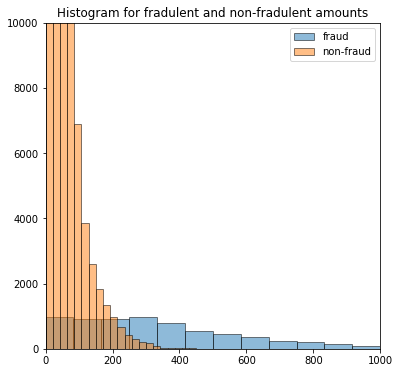

In [ ]:
plt.hist(data_found_fraud.amount,alpha=0.5,label="fraud",bins=100,edgecolor="black")
plt.hist(data_non_fraud.amount,alpha=0.5,label="non-fraud",bins=100,edgecolor="black")
plt.xlim(0,1000)
plt.ylim(0,10000)

plt.title("Histogram for fradulent and non-fradulent amounts")
plt.legend()
plt.show()



In [ ]:
age_fraud=dataset.groupby('age')['fraud'].mean()*100
age_fraud.reset_index().rename(columns={'age':'Age','fraud':'fraud-mean'})




,Age,fraud-mean
0,'0',1.957586
1,'1',1.185254
2,'2',1.251401
3,'3',1.192815
4,'4',1.293281
5,'5',1.095112
6,'6',0.974826
7,'U',0.594228



from the above analysis age below 18 i.e (0)th category has more chance of fraud occuring

# algorithms

In [ ]:
dzip=dataset.zipcodeOri.nunique()
dmer=dataset.zipMerchant.nunique()
                                                      
# erasing the zipCodeOri and zipMerchant values from the dataset"
dataset = dataset.drop(['zipcodeOri','zipMerchant'],axis=1)
print("Unique zipCodeOri values: ",dzip)
print("Unique zipMerchant values: ",dmer)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [ ]:
M=dataset.shape[1]
print(M)
dataset.head()

8


,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [ ]:
#changing datatype of object to categorical
col_cat=dataset.select_dtypes(include='object').columns
for i in col_cat:
  dataset[i]=dataset[i].astype('category') 
#changing categorical values to numericals
dataset[col_cat]=dataset[col_cat].apply(lambda i:i.cat.codes)
dataset.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


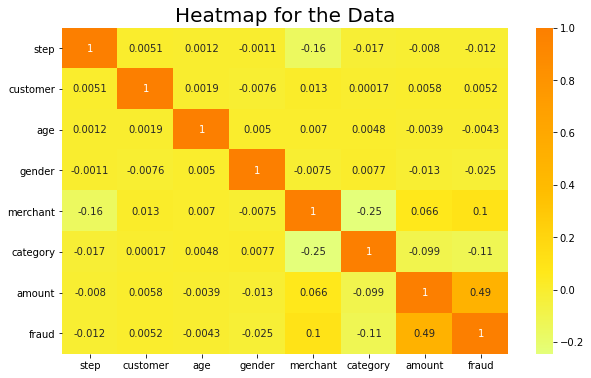

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(dataset.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [ ]:
#dataset['customer'].plot(kind="bar")

In [ ]:
x=dataset.drop(['fraud'],axis=1)
y=dataset['fraud']
print(x)
print()
print(y)

        step  customer  age  gender  merchant  category  amount
0          0       210    4       2        30        12    4.55
1          0      2753    2       2        30        12   39.68
2          0      2285    4       1        18        12   26.89
3          0      1650    3       2        30        12   17.25
4          0      3585    5       2        30        12   35.72
...      ...       ...  ...     ...       ...       ...     ...
594638   179      1639    3       1        18        12   20.53
594639   179      3369    4       1        18        12   50.73
594640   179       529    2       1        31         2   22.44
594641   179      1083    5       2        18        12   14.46
594642   179      3304    4       1        18        12   26.93

[594643 rows x 7 columns]

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594643, dtype: int64


In [ ]:
y[y==1].count()

7200

In [ ]:
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_sample(x, y) 
print('the shape of train_X: {}'.format(X_train_miss.shape)) 
print('the shape of train_y: {} \n'.format(y_train_miss.shape)) 
print("counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("counts of label '0': {}".format(sum(y_train_miss == 0)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


the shape of train_X: (14400, 7)
the shape of train_y: (14400,) 

counts of label '1': 7200
counts of label '0': 7200


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_miss, 
y_train_miss ,test_size=0.3,random_state=42,
shuffle=True,stratify=y_train_miss)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("the confusion matrix is =")
print(cm)
print("accuracy per=",accuracy_score(y_test,y_pred)*100)

the confusion matrix is =
[[2071   89]
 [ 283 1877]]
accuracy per= 91.38888888888889


In [ ]:
knn_cls=KNeighborsClassifier(n_neighbors=5,p=2)
knn_cls.fit(X_train,y_train)
y_pred=knn_cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy per=",accuracy_score(y_test,y_pred)*100)


[[2067   93]
 [  75 2085]]
accuracy per= 96.11111111111111


In [ ]:
rf=RandomForestClassifier(n_estimators=100,
        max_depth=8,random_state=42,verbose=1,
                     class_weight="balanced")
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("the confusion matrix is =")
print(cm)
print("accuracy per=",accuracy_score(y_test,y_pred)*100)




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


the confusion matrix is =
[[2067   93]
 [  75 2085]]
accuracy per= 96.64351851851852


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
